# Analisis Exploratorio de Datos

## 1. Listado de variables y selección

### Variables de Entrada
* Year: Contiene el año en que fue lanzado el videojuego
* Gener: Contiene el genero del videojuego
* Publisher: Indica el nombre de la empresa que lo producio
* North America: Indica la cantidad de ventas en Norte America
* Europe: Muestra la cantidad de ventas en Europa
* Japan: Muestra las ventas del juego en Japon
* Rest of World: Muestra la cantidad de ventas en el resto de los paises

### Variable de Salida
* Global: Nos muestra el total de ventas que tuvo el juego en el mundo.
    Los valores que pueden tener, muestra la cantida de ventas en Millon (1.03 Millones, 0.22 Millones, etc)

In [1]:
# Importamos las dependencias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import sklearn_pandas
from matplotlib import gridspec
import pytz

In [2]:
# Importamos el dataset.
dataset = pd.read_csv('DataSet.csv',encoding='UTF-8')
dataset = dataset.set_index("Game")
dataset.sample(5)

,Year,Gener,Publisher,North America,Europe,Japan,Rest of World,Global
Game,,,,,,,,
Dead by Daylight,2017.0,Action,505 Games,0.11,0.06,0.02,0.04,0.22
In Space We Brawl,NaN,Shooter,NaN,0.00,0.00,0.00,0.00,0.00
The Evil Within,2014.0,Action,Bethesda Softworks,0.56,0.90,0.11,0.28,1.86
Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
Ni-Oh,2017.0,Action,Tecmo Koei,0.34,0.36,0.20,0.14,1.03


In [3]:
# Tipo de datos y dimensiones del Dataset.
dataset.dtypes

Year             float64
Gener             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object

In [4]:
dataset.shape

(1034, 8)

## 2. Análisis detallado de un conjunto de variables

### a. Balanceo de la variable de salida

<Axes: ylabel='count'>

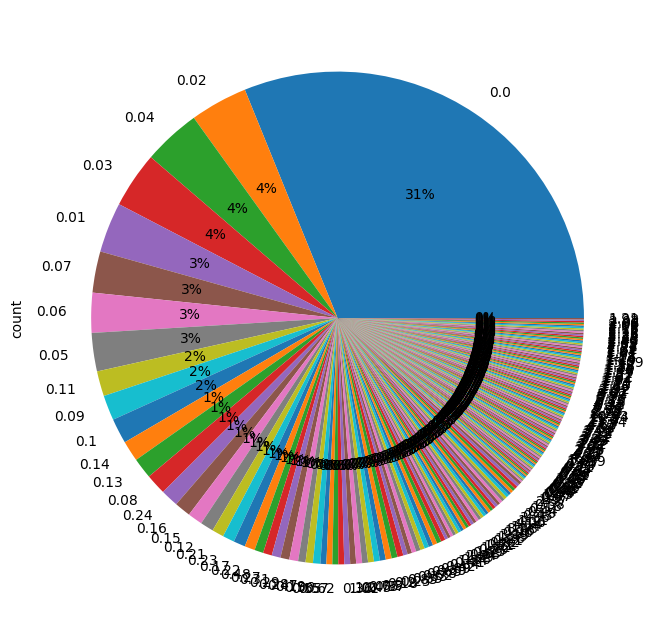

In [6]:
dataset.Global.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

Como se puede observar en el gráfico, el 31% de los videojuegos no concigio superar las Mil ventas (esto se ve porque se refleja con una cantidad de 0,00).
Mientras que hay un 12% de videojuegos que consiguiron  ventas de entre 0,02 Millones y 0,04 Millones.

Este sesgo, debido a la mayor cantidad de valores 0,00 , podría afectar el entrenamiento del modelo y la medición del rendimiento ya que este podría aprender a predecir, que en la mayoría de los casos, los videojuegos no poseen ventas mayores a 0,00.

### b. Comportamiento de las variables de entrada y su relación con la variable de salida

* Gener

Analizaremos los graficos con relación al Genero para ver cuantos tipos del mismo hay, esto nos va a servir para ver que genero de videojuego se vende mas y cual se vende menos

In [7]:
px.histogram(dataset, x='Gener', title = 'Distribución')

In [8]:
px.histogram(dataset, x='Gener', color='Global', barmode='group')

* Publisher

Vamos a ver cuantas empresas producieron videojuegos y cuantos hicieron cada uno.
Esta variable nos va a servir para saber si, las ventas pueden ser afectadas segun la empresa desarrolladora.

In [9]:
px.histogram(dataset, x='Publisher', title = 'Distribución')

In [10]:
px.histogram(dataset, x='Publisher', color='Global', barmode='group')

* North America

Esta variable de entrada nos va a mostrar la cantidad de ventas de los videojuegos en esta region y cual de estos se vendio mas y cual menos.

In [11]:
px.histogram(dataset, x='North America', title = 'Distribución')

In [12]:
px.histogram(dataset, x='North America', color='Global', barmode='group')

* Europe

Esta variable de entrada nos va a mostrar la cantidad de ventas de los videojuegos en esta region y cual de estos se vendio mas y cual menos.

In [14]:
px.histogram(dataset, x='Europe', title = 'Distribución')

In [15]:
px.histogram(dataset, x='Europe', color='Global', barmode='group')

* Rest of World

Esta variable de entrada nos va a mostrar la cantidad de ventas de los videojuegos en esta region y cual de estos se vendio mas y cual menos.

In [16]:
px.histogram(dataset, x='Rest of World', title = 'Distribución')

In [17]:
px.histogram(dataset, x='Rest of World', color='Global', barmode='group')

### c. Transformaciones sobre las variables de entrada

Para las sigientes variables de entradas, se utilizara One Hot Encoder ya que ambas se pueden contemplar como categorias.
* Genre
* Publisher

Para las siguientes 3 variables, buscaremos agrupar los valores por rangos de 0,05 lo cual sera útil, ya que ventas entre 0,02 y 0,03 no representa una diferencia significativa en algunos casos y se evitaría que el modelo haga asociaciones erróneas. De paso nos servira para reducir la cantidad de rangos.
* North America
* Europe
* Rest of World

### d. Valores null, valores extremos y otros

In [13]:
# Sumamos la cantidad de valores null por cada variable.
dataset.isnull().sum()

Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

Como se puede ver, la cariable Genre no posee nulos, mientras que las variables Year y Publisher posee 209 nullos.

En el caso de los extremos, no creemos que sea necesario hacer tratamiento ya que son valores que nos pueden servir para predecir.

### e. Variables altamente correlacionadas con la variable "target"

En las variables de entradas, poseemos 3 que estan correlacionada con la variable target.
* North America
* Europe
* Rest of World

Estas estan relacionadas ya que nos indican una parte aproximada de las ventas globales del videojuego.

## 3. Hipótesis sobre los datos

### a. Formular hipótesis sobre la variable target bajo determinadas condiciones

* Hipotesis 1

Segun el genero del videojuego puede generar mas ventas que otro tipo de genero.



* Hipotesis 2

Segun la empresa que produzca el videojuego, se puede llegar a vender mas copias del juego, en comparacion con juegos desarrollados por empresas Indie.

### b. Comprobar las hipótesis